### Data Science Questions

### Question 1

Python

Take a short list of strings and return a new list of strings with "!" appended to
each string and using two different methods:

a. list comprehension

b. recursion

### Answer

In [1]:
# a)

original_list = ["stringA", "StringB", "StringC", "stringD"]
new_list_a = [string + "!" for string in original_list]
new_list_a

['stringA!', 'StringB!', 'StringC!', 'stringD!']

In [2]:
# b)

original_list = ["stringA", "StringB", "StringC", "stringD"]

def recursive_append(list_strings, index = 0):
    """
    Use recursion to elementwise append "!" to the strings of the list

    :param list_strings: list of strings
    :return: list of strings with "!" appended to each element
    """ 
    if index < len(list_strings):
        return [list_strings[index] + "!"] + recursive_append(list_strings, index + 1)
    else:
        return []

recursive_append(original_list)

['stringA!', 'StringB!', 'StringC!', 'stringD!']

### Question 2

You have an email priority classification project (high priority or not) and one of the candidate features that you are considering is whether the sender is in the recipient's contact list. If the client gives you two years' worth of data to train on and every email has in its metadata a value for is_contact, what is important to ask the client (who doesn’t know much about data science or machine learning) about is_contact that makes sense to ask in the first conversation when they give you the data (assume a 15-30 min conversation)?

### Answer

I believe the following questions are worth asking the client, but some of them wouldn't be needed if more information about the metadata or the problemt itself were previously given.

##### However, it is important to note that some questions should not be asked if the client is not technical neither has a technical which would be able to answer the questions!

The questions are:
    
1) What is the definition of "is_contact"? Does it mean that the sender is in the recipient's contact list, or could it be the other way around?


2) Does "is_contact" reflect the information at the moment the email was sent? Or, given how the metadata was generated, could it be contaminated with future information? For example, if two users exchange a few emails, and during the interaction they get added to each other's contact list, would "is_contact" hold the value "True" for all interactions, or only for those after the sender is in the recipient's contact list?


3) How was "is_contact" collected? Where did this metadata come from? Was it extracted by the email provider or created by a human? Is there any risk of incorrect labelling?


4) Does the client believe that the most important emails he receives are the ones already in his contact list? If there is no meaningful correlation, this feature could turn out to be useless in practice, and other information should be prioritized when gathering metadata to build the model.


5) Would the system be able to retrieve this information with the same definition from the training data, and also with low latency? (important for deploying the model to production)

### Question 3

You need to implement a logistic regression classifier with online learning where some of
the weights might be fixed at times during learning. How would you do this? Feel free to
use existing libraries in your language of choice. You don't need to code it up, but you
should have a good idea of what steps need to be done and be prepared to answer any
questions that we might have

### Answer

In Python, it is possible to implement this classifier using the "statsmodels" library
with glm (Generalized Linear Models), and setting "offset" as an argument to the definition of the Logistic Regression classifier

It is also possible to do implement using clogistic "constrained logistic" (see code below!)

After multipliying the offset (weight of the feature in the Logisti Regression) with the elements of the column, it is possible to fix the coefficient when learning the model equation

For using the classifier in production, just use numpy (or any other equivalent library)
and the generated equation, for example (in our code below):

"y ~ Intercet + x1 + x2 + x3 + x3"

This approach is usually used when there is already a complex model,
which needs to be re-estimated to cover some new data outside the realm of the original data sample, but where, for various reasons, it is practically infeasible to re-estimate the model on the entire, expanded data set. The goal is a new model that gives good predictions on some out-of-sample data, but which gives unchanged predictions on the in-sample data.

#### Python Code

[[ 10.          20.         -24.78906403  -9.14600911]]


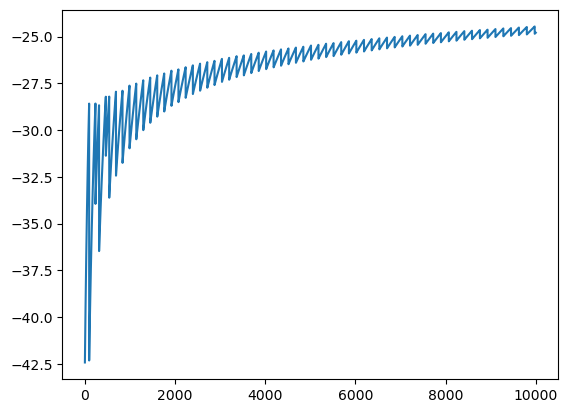

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# load data on a pandas dataframe
df = sns.load_dataset("iris")
df['species'] = [1 if value == 'setosa' else 0 for value in df['species']]
df.columns = ["x1", "x2", "x3", "x4", "y"]

# X and y
X = df[["x1", "x2", "x3", "x4"]]
y = df["y"]

# split dataset
X_train_offline, X_train_online, y_train_offline, y_train_online = train_test_split(X, y, test_size=0.3, random_state=42)

# logistic regression classifier (using SGDC)
clf = SGDClassifier()

# fit
clf.fit(X_train_offline, y_train_offline)

# iterate long enough for the algorithm to converge
array_coef = []
for i in range(2000):
    for j in range(0, len(X_train_online), 10):
        clf.partial_fit(X_train_online[j:j+10], y_train_online[j:j+10])

        # fixed weights (weight 1 and 2)
        clf.coef_[0][0] = 10
        clf.coef_[0][1] = 20

        # append
        array_coef.append(clf.coef_[0].copy())
        
# coef
print (clf.coef_)

# plot coef
plt.plot(np.array(array_coef)[:, 2])

### Question 4

You are working at a startup hedge fund. A model receives time-series data for various
stocks and outputs automated trading decisions. A not-yet-fully-understood bug in the
code causes the algorithm to, on occasion, reverse the model's intended trade (e.g. buy
when you would sell or vice versa). It has already been determined that the bug lives in
the code executing trades and not in the model code itself.
You investigate a little bit, and discover that the probability of the bug occurring on any
given trade is ~ 0.001. Every trade either gains or loses $5,000 (all the bug does is flip
the decision the model makes).
The fund typically executes ~10,000 trades in a year. The model (independent of the
bug), chooses correctly on ~52% of the trades it selects. What do you do next and why?

### Answer

Inputs:

1) Bug probability = 0.1%

2) Trades per year = 10.000

3) Gain or loss per trade: $5,000

4) Probability to choose correctly (model): 52%


Solution:

1) Profitability without the bug:

Expected gain per trade = (52\% * \\$5.000) - (48\% * \\$5.000) = (4\% * \$5.000) = \\$200


Expected gain per year = (10.000 * \\$200) = \$2.000.000


2) Profitability loss due to the bug:

Expected loss per trade = 0.1\% * (52\% * \\$5.000 - 48\% * \$5.000) = (0.1\% * 4\% & \\$5.000) = \\$0.02 (20 cents)


Expected loss per year = 10.000 * \$0.02 = \\$200


So, the total profit without the bug would be:

\\$2.000.000 + \\$200 = \$2.000.200

Which means that the bug reduces the total profitability by:

(\\$200/\\$2000000) = 0.0001 = 0.01%

As the total impact is irrelevant to the business, all the efforts from the Product Owners, Data Science and Data Engineering teams should focus on improving the model and its accuracy, and not on finding out the reasons for the bug and correcting it. Even a small increment in accuracy would be incredibly beneficial to the business.

However, it is important to understand if the bug could occur more frequently in the future,
so it would also be interesting to keep monitoring the occurance of the bug in production.
If the probability increases a lot (say, from 0.1% to something close to 1%), it would be beneficial to allocate a software engineer to try and debug the code. If he could also optimize the code in this process (to reduce trading latency, for example), it would be even better.